# Esercitazione 12
**13  Maggio 2025**

In [1]:
import numpy as np
import scipy.linalg as splin
import SolveTriangular as tri
import matplotlib.pyplot as plt


### Codice EquazioniNormali
Implementare la function  **eqnorm(A,b)** che implementa il metodo delle equazioni normali per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare 

In [8]:
def eqnorm(A, b):
    G = A.T@A
    condG= np.linalg.cond(G)
    print("Indice di condizionamento di G ", condG)

    f = A.T@b
    #G è simmetrica e def pos(se A ha rango max)
    L=splin.cholesky(G, lower=True)
    U=L.T
    z,flag = tri.Lsolve(L, f)
    if flag == 0:
        x, flag = tri.Usolve(U, z)

    return x

### Codice QRLS
Implementare la function  **qrLS(A,b)** che utilizza il metodo QR per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

In [19]:
def qr_ls(A,b):
    n=A.shape[1]
    Q,R=splin.qr(A)
    h=Q.T@b
    h1=h[:n]
    h2=h[n:]
    x,flag=tri.Usolve(R[:n,:n],h1)
    residuo2=np.linalg.norm(h2)
    print("residuo 2 ", residuo2)
    return x

In [21]:
coefp = np.poly([1,2])
print("coefp ", coefp)

coefp  [ 1. -3.  2.]


### Codice SVDLS
Implementare la function  **svdLS(A,b)** che utilizza  il metodo SVD per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

## Esercizio 1
- Si utilizzino i tre metodi implementati  per l'approssimazione ai minimi quadrati delle seguenti configurazioni di dati:

$$
\begin{array}{l}
x_1 = [-3.5, \, -3, \, -2, \, -1.5, \, -0.5, \, 0.5, \, 1.7, \, 2.5, \, 3] ;\\
y_1 = [-3.9, \, -4.8, \, -3.3, \, -2.5, \, 0.3, \, 1.8, \, 4, \, 6.9, \, 7.1] ;\\
x_2 = [-3.14, \, -2.4, \, -1.57, \, -0.7, \, -0.3, \, 0, \, 0.4, \, 0.7, \, 1.57] ;\\
y_2 = [0.02, \, -1, \, -0.9, \, -0.72, \, -0.2, \, -0.04, \, 0.65, \, 0.67, \, 1.1] ;\\
x_3 = [[1.001,\, 1.004,\, 1.005,\,1.0012, \,1.0013,  \, 1.0014,  \, 1.0015, \, 1.0016] ;\\
y_3 = [-1.2, \, -0.95, \, -0.9, \, -1.15, \, -1.1, \, -1] ;\\
\end{array}
$$

al variare del grado $n$ tra 1 e 4.



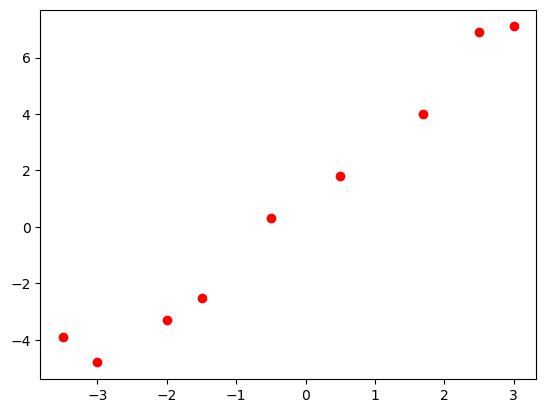

In [9]:
x_1 = np.array([-3.5, -3, -2, -1.5, -0.5, 0.5, 1.7, 2.5, 3])
y_1 = np.array([-3.9, -4.8, -3.3, -2.5, 0.3, 1.8, 4, 6.9, 7.1])
plt.plot(x_1, y_1, 'ro')
plt.show()

In [10]:
m=x_1.shape[0]
n=1
n1=n+1#gradi di libertà del polinomio
A=np.vander(x_1, increasing=True)[:, :n1]
print(A)
coeff_Pn_eqn= eqnorm(A, y_1)
print("Soluzione EQN ", coeff_Pn_eqn)

NameError: name 'x_1' is not defined

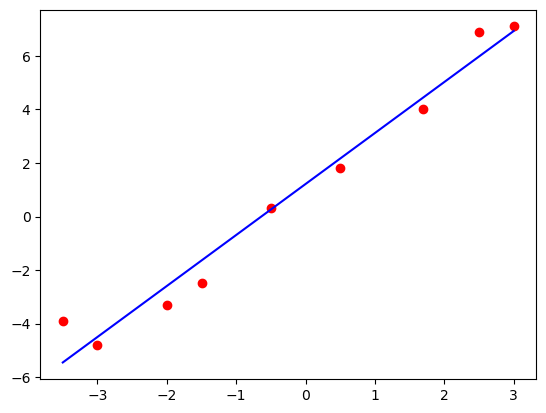

In [13]:
xv= np.linspace(np.min(x_1), np.max(x_1),100)
polEQN = np.polyval(np.flip(coeff_Pn_eqn),xv)
plt.plot(x_1, y_1, 'ro', xv, polEQN, 'b')

## Esercizio 2: 
Per i dati $(x_i, y_i)$ riportati nei seguenti array

$$
\begin{array}{l}
x = [0.0004, \, 0.2507, \, 0.5008, \, 2.0007, \, 8.0013]  ;\\
y = [0.0007, \, 0.0162, \, 0.0288, \, 0.0309, \, 0.0310] ;
\end{array}
$$

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;

Quale tra le due approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).



### Codici per l'interpolazione polinomiale nella forma di Lagrange 

Scrivere la function **interpL** che calcoli
il polinomio interpolante in forma di Lagrange  
Tale function deve assumere come dati in input:
 
 - x vettore dei nodi di interpolazione,
- y vettore dei valori della funzione nei nodi di interpolazione,
- xx vettore dei punti in cui si vuole valutare il polinomio interpolante.
 
In output deve essere restituito yy vettore contenente i valori assunti dal polinomio interpolante.

 
Funzioni Python  utili:
 
-  numpy.poly() restituisce i coefficienti di un polinomio di zeri assegnati,
 - numpy.polyval(p, x)  valuta un polinomio in un punto assegnato.
 

In [40]:
def plagr(xnodi, j):
    n=xnodi.size
    xzeri = np.zeros_like(xnodi)#vettore di nodi in cui si annulla  il polinomio j-esimo
    if j==0:
        xzeri = xnodi[1:n]
    else:
        xzeri = np.append(xnodi[0:j], xnodi[j+1:n])

    num = np.poly(xzeri)
    den = np.polyval(num,xnodi[j])

    p=num/den

    return p 

In [36]:
def InterpL(x, y, xv):
    n=x.size
    m=xv.size
    L=np.zeros((m,n))
    for j in range(n):
        p=plagr(x,j) #calcolo del j-esimo polinomio di Lagrange
        L[:,j]=np.polyval(p,xv)#valutazione del j-esimo polinomio di Lagrange nei punti di valutazione
    pol=L@y
    return pol

## Esercizio 1

Realizzare uno script che calcoli nella forma di Lagrange i polinomi che
interpolano le funzioni test $\sin(x)$ e $\cos(x)$ nei punti $x_k = k \pi/2$, con
$k = 0, 1, 2, 3, 4$. Visualizzare graficamente i polinomi ottenuti insieme
alle funzioni assegnate.

[0.         1.57079633 3.14159265 4.71238898 6.28318531] [ 0.0000000e+00  1.0000000e+00  1.2246468e-16 -1.0000000e+00
 -2.4492936e-16]


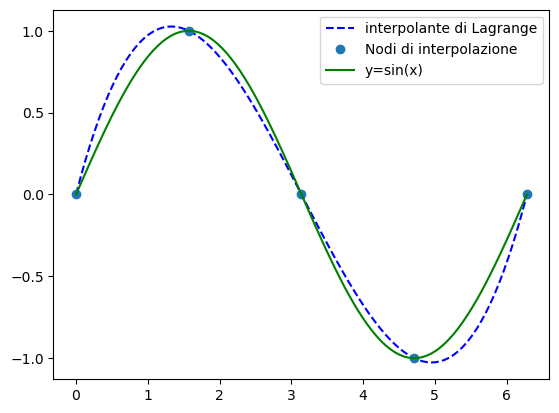

In [45]:
x=np.arange(0,2*np.pi+0.1, np.pi/2)
y=np.sin(x)
print(x, y)
xv = np.linspace(np.min(x), np.max(x), 100)
polL=InterpL(x,y,xv)
plt.plot(xv, polL, 'b--', x,y, 'o',xv, np.sin(xv), 'g-')
plt.legend(['interpolante di Lagrange', 'Nodi di interpolazione', 'y=sin(x)'])

## Esercizio 2
Realizzare uno script python che interpola le coppie $x_i,y_i$, $i=0,\cdots,3$
dove $x_i,i=0,3$ sono punti equidistanti nell' intervallo [-1,1] e $y_i=f(x_i)$ dove $f(x)=3x^3+2x^2+2x-1$ 

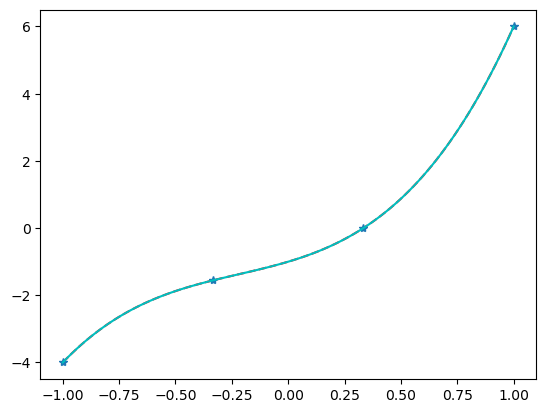

In [65]:
f=lambda x:3*x**3+2*x**2+2*x-1
x2=np.linspace(-1,1,4)
y2=f(x2)
xv2=np.linspace(-1,1,100)
polL2= InterpL(x2,y2,xv2)
plt.plot(xv2,polL2,'r--',x2,y2,'*', xv2,f(xv2),'c-')

## Esercizio 3

La temperatura $T$ in  prossimità  del suolo  subisce una variazione dipendente dalla latitudine $L$ nel seguente modo

L=np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])

T=np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])


 
- Si vuole costruire un modello che descriva la legge $T = T(L)$ anche per latitudini non misurate. A tal fine si scriva uno script che fornisca la variazione di temperatura alle latitudini $L = \pm 42$ utilizzando il polinomio interpolante. Visualizzare in un grafico i dati assegnati, il polinomio interpolante e le stime di $T$ ottenute per $L = \pm 42$.


## Esercizio 4 

Scrivere uno script che calcoli il polinomio interpolante un insieme di punti $P_i =(x_i, y_i)$ $i = 0, ..., n $ nella forma di Lagrange con $x_i$ scelti dall'utente come:
    - punti equidistanti in un intervallo $[a, b]$,
    - punti definiti dai nodi di Chebyshev nell'intervallo $[a, b]$, ossia
$$
x_i = \frac{(a + b)}{2}+\frac{(b-a)}{2} \, \cos \left(
\frac{(2i+1)\pi}{2(n + 1)}
\right), \quad  i =0, ..., n 
$$
 
  e $y_i = f(x_i)$ ottenuti dalla valutazione nei punti $x_i$ di una funzione test   $f: \ [a, b] \rightarrow {\mathbb R}$. Testare lo script sulle funzioni
 
  - $f(x) = \sin(x)-2 \sin(2x)$,   $ \quad x \in [-\pi,\pi]$,
  -  $f(x) = \sinh(x)$, $ \quad  x \in [-2, 2]$,
  - $f(x) = |x|$,  $ \quad x \in [-1, 1]$,
  - $f(x) = 1/(1+25*x^2)$,  $ \quad x \in [-1, 1]$ (funzione di Runge).

Calcolare l'errore di interpolazione $r(x) = f(x)-p(x)$,
tra la funzione test $f(x)$ e il polinomio di interpolazione $p(x)$.
Visualizzare il grafico di $f(x)$ e $p(x)$, ed il grafico di
$|r(x)|$. Cosa si osserva? Cosa accade all'aumentare del grado $n$ di $p(x)$?
(Si costruisca una tabella che riporti i valori di $\|r(x)\|_{\infty}$ al variare di $n$).

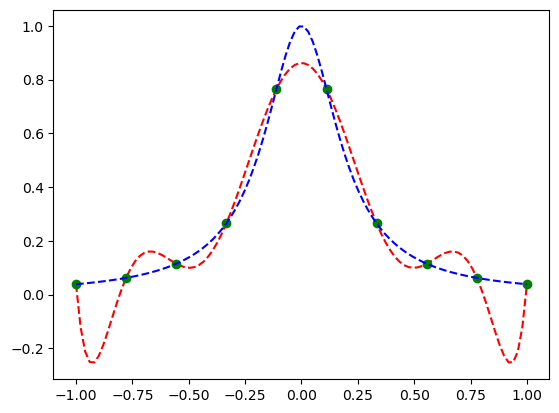

In [84]:
f4=lambda X:1/(1+25*X**2)
n=9
x4=np.linspace(-1, 1, n+1)
y4=f4(x4)
xv4=np.linspace(-1,1,100)
polL4=InterpL(x4,y4,xv4)
plt.plot(xv4,polL4,'r--',x4,y4,'go', xv4,f4(xv4),'b--')

In [110]:
def zeri_Cheb(a,b,n):
    t1=(a+b)/2
    t2=(b-a)/2
    x=np.zeros((n+1))
    for k in range(n+1):
        x[k]=t1+t2*np.cos(((2*k+1)/(2*(n+1))*np.pi))
    return x


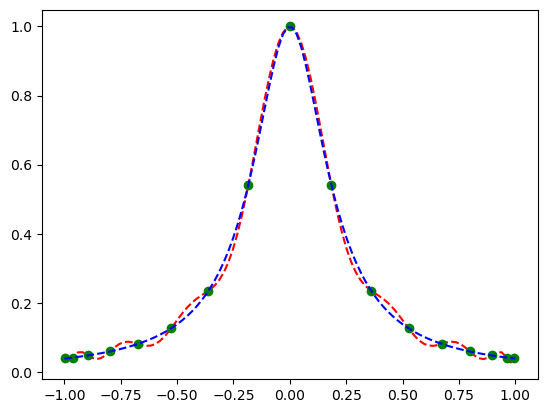

In [112]:
n=15
x4cheb=zeri_Cheb(-1, 1, n+1)
y4cheb=f4(x4cheb)
xv4=np.linspace(-1,1,100)
polL4cheb=InterpL(x4cheb,y4cheb,xv4)
plt.plot(xv4,polL4cheb,'r--',x4cheb,y4cheb,'go', xv4,f4(xv4),'b--')

## Esercizio 5

Per $n = 5, 10, 15, 20$ fornire un'approssimazione della costante di Lebesgue
scegliendo $x_1, x_2, ..., x_{n+1}$ equispaziati in $[-1, 1]$ oppure coincidenti con
i nodi di Chebyshev $x_i = \cos \left(\frac{(2i-1)\pi}{2(n + 1)}  \right)$, $i =1, ..., n + 1$.

In [98]:
n=10
xe=np.linspace(-1,1,n+1)
xc=zeri_Cheb(-1,1,n+1)
xv6=np.linspace(-1,1,100)

sumL=np.zeros((100,1))
for i in range(n):
    pe=plagr(xe,i)
    sumL=sumL+np.abs(np.polyval(pe,xv6))
Leb_e=np.max(sumL)

print(Leb_c)

NameError: name 'Leb_c' is not defined

## Esercizio 6

Si interpolino mediante il polinomio $p_{21}(x)$ i 22 punti $(x_i, y_i)$ con $x_i$ equispaziati in $[-1, 1]$ e $y_i = \sin(2 \pi x_i)$. Si considerino poi le ordinate $\tilde{y}_i = y_i + \varepsilon_i$, dove $\varepsilon_i$ denota l'$i$-esima componente del vettore $0.0002*np.random.random(22,)$, e si calcoli il corrispondente
polinomio interpolante $\tilde{p}_{21}(x)$. Si visualizzino e si commentino
i risultati ottenuti, calcolando anche l'errore relativo sul polinomio interpolante
e sui dati.
